In [1]:
import mediapipe as mp
import cv2
import numpy as np

/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


In [16]:
from google.colab import files

uploaded = files.upload()

Saving posture_bad_2.jpg to posture_bad_2.jpg


In [3]:
mp_pose = mp.solutions.pose # распознавание позы человека (33 ключевые точки тела), пока взяла то, что есть, на спине нужно самостоятельно доставлять (вдоль позвоночника)
pose = mp_pose.Pose()

In [17]:
image = cv2.imread("posture_bad_2.jpg")
results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [18]:
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark

    # Получаем координаты плеч и бёдер
    l_shoulder = np.array([landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                           landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y])
    r_shoulder = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                           landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y])
    l_hip = np.array([landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y])
    r_hip = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                      landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y])

    # Центры
    shoulder_center = (l_shoulder + r_shoulder) / 2
    hip_center = (l_hip + r_hip) / 2

    # Вектор позвоночника
    spine_vec = shoulder_center - hip_center

    # Угол относительно вертикали
    angle = np.degrees(np.arctan2(spine_vec[0], spine_vec[1]))

    if abs(angle) < 10:
        print("Осанка ровная")
    else:
        print("Есть наклон")

Есть наклон


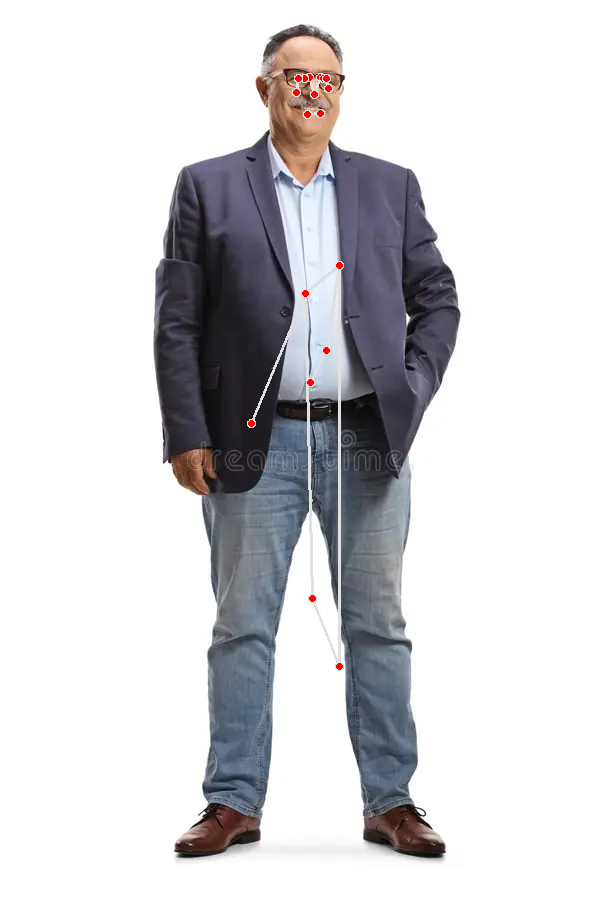

In [11]:
mp_drawing = mp.solutions.drawing_utils

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2_imshow(image)

C человеком в одежде плохо справился, не нашёл ключевые точки верно.

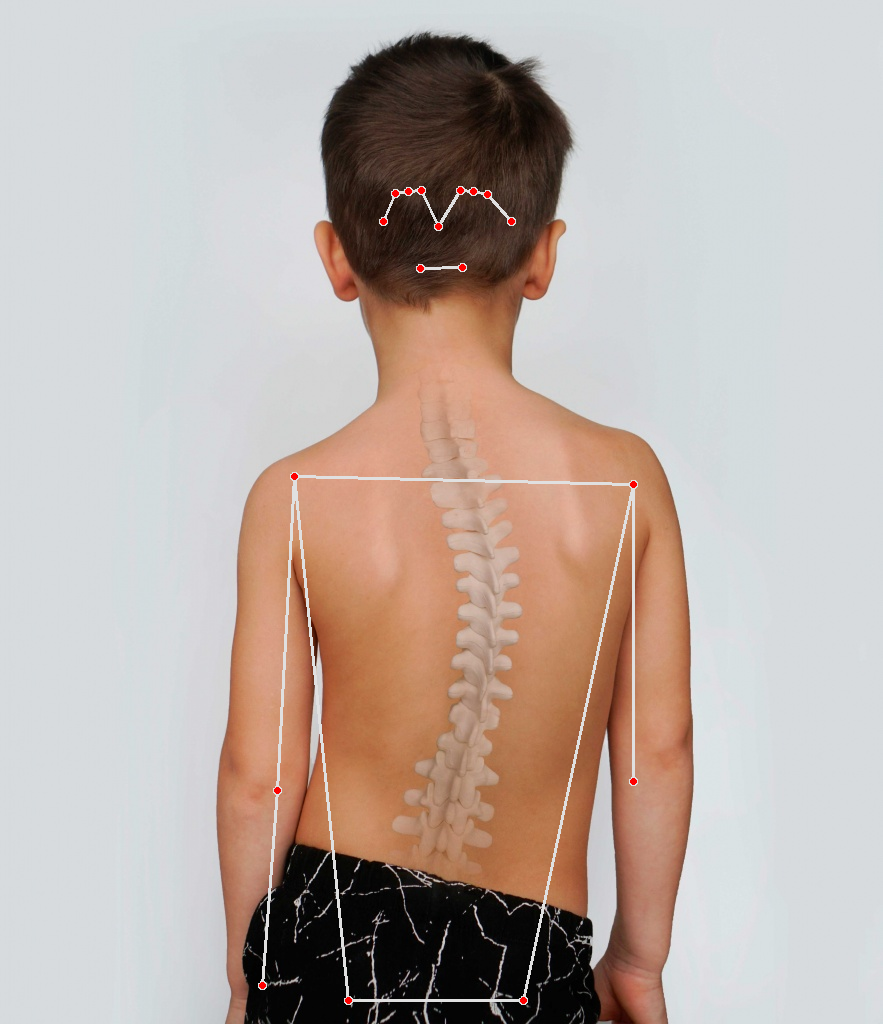

In [7]:
from google.colab.patches import cv2_imshow
mp_drawing = mp.solutions.drawing_utils

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2_imshow(image)


Здесь неплохо, верно найдены точки плечей, локтей, с бёдрами похуже, но учитывая, что фотография обрезана, неплохо. Отчётливо виден перекос в плечах.

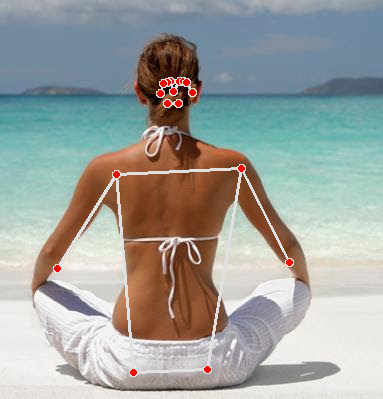

In [15]:
from google.colab.patches import cv2_imshow
mp_drawing = mp.solutions.drawing_utils

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2_imshow(image)

Тоже точки найдены хорошо, но я подразумевала, что это будет положительный пример, но, оказывается очень тяжело найти идеально ровную спину. Если присмотреться, то видно что линия бёдер чуточку наклонена и плечи тоже не идеально на одном уровне.

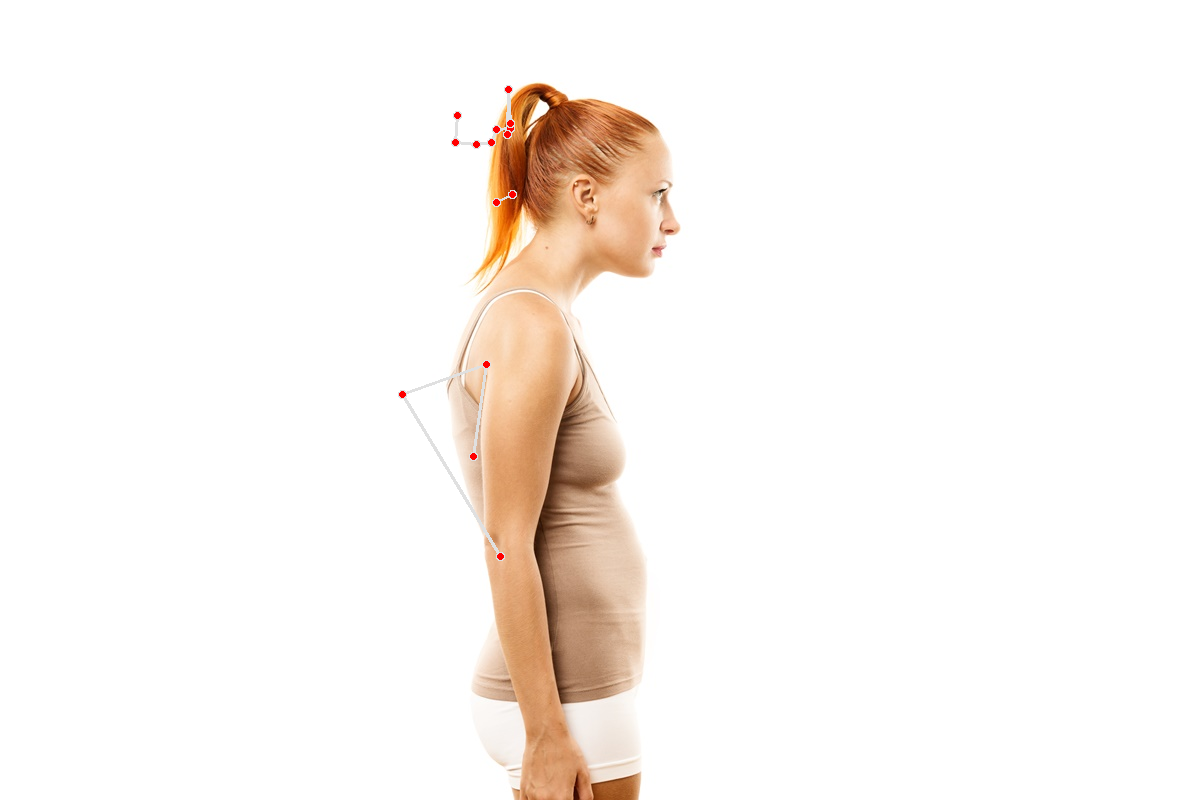

In [19]:
from google.colab.patches import cv2_imshow
mp_drawing = mp.solutions.drawing_utils

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2_imshow(image)

Эта фотка была на тест, справится ли алгоритм с боковым фото. Не справился.. В данном случае согласно моей логике должен рассматриваться угол между линией соединяющей бёдра и линией, соединяющей плечи, но тут совсем не видно второго плеча, бедра. Надо как-то придумать, обработать ситуацию (первое, что приходит в голову - точки на шее и спине). В MediaPipe они не предусмотрены, нужно будет придумать, как доставить их.

Выводы: мешковатую одежду и боковой ракурс я пока не одолела, но ровно стоящие люди в обтягивающей одежде, а лучше без неё в принципе адекватно обрабатываются.